In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

## **Data Collection** 

In [3]:
df = pd.read_csv('/kaggle/input/housing-prices-regression/real_estate_dataset.csv')

## **Data Representation**

In [4]:
df

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583,488496.350722
496,497,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105,657736.921717
497,498,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264,405324.950201
498,499,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684,773035.968028


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


## **Data Wrangling**

### **Drop Unneeded Columns**

In [6]:
df.drop(columns=['ID'], inplace=True)

In [7]:
df.head(3)

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880


### **Hanlde Missing Values**

In [8]:
df.isna().sum()

Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

### **Drop Duplicated Values**

In [9]:
df.duplicated().sum()

0

## **Data Analysis**

**Square Feet**

In [10]:
df['Square_Feet'].describe()

count    500.000000
mean     174.640428
std       74.672102
min       51.265396
25%      110.319923
50%      178.290937
75%      239.031220
max      298.241199
Name: Square_Feet, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


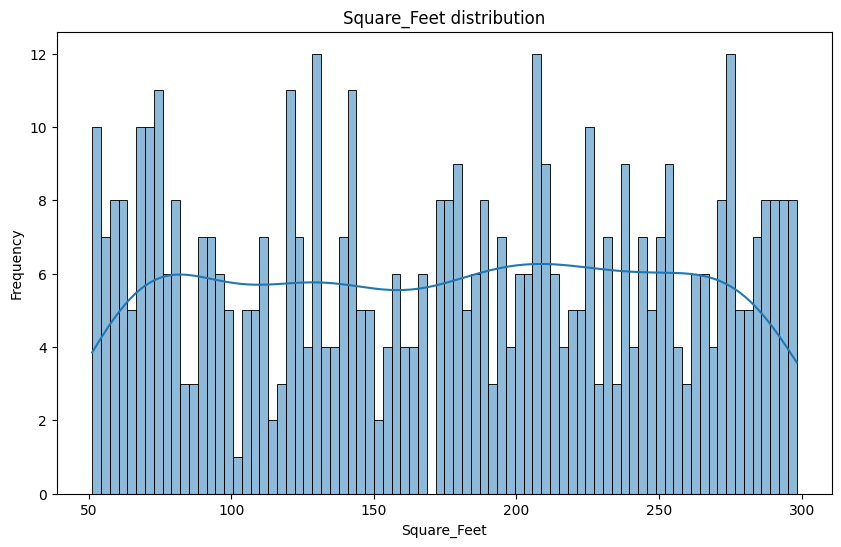

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['Square_Feet'],bins=80, kde=True)  
plt.title("Square_Feet distribution")
plt.xlabel("Square_Feet")
plt.ylabel("Frequency")
plt.show()

**Num_Bedrooms**

In [12]:
df['Num_Bedrooms'].value_counts()

Num_Bedrooms
1    109
5    105
3    105
2     97
4     84
Name: count, dtype: int64

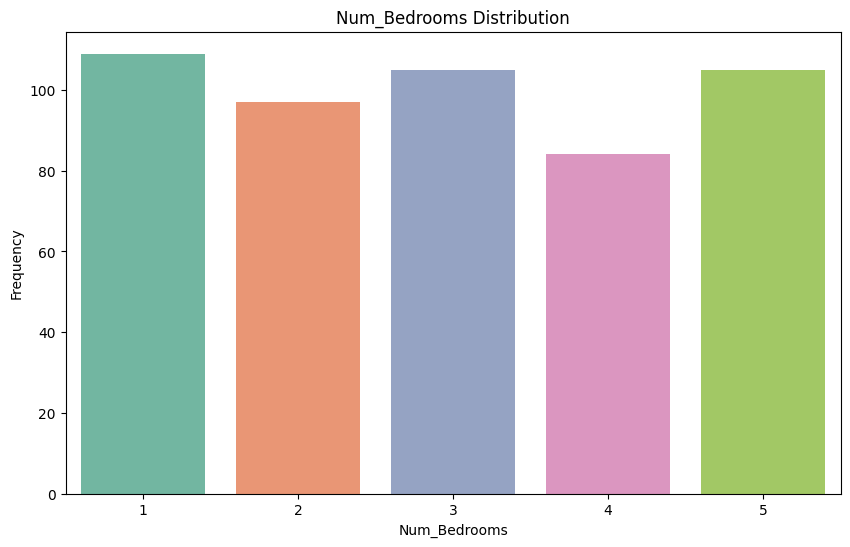

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Num_Bedrooms'].value_counts().index,
            y=df['Num_Bedrooms'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('Num_Bedrooms Distribution')
plt.xlabel('Num_Bedrooms')
plt.ylabel('Frequency')
plt.show()

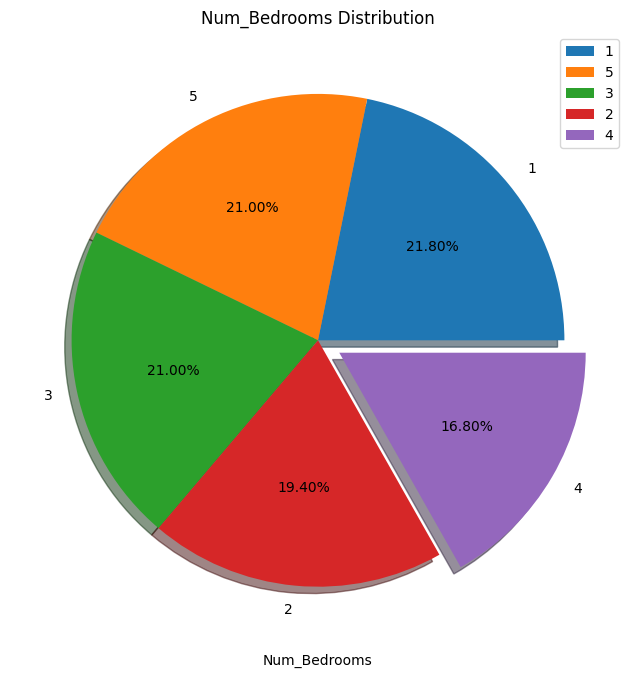

In [14]:
plt.figure(figsize=(10, 8))
plt.pie(df['Num_Bedrooms'].value_counts(),
        explode=[0,0,0,0,0.1],
        labels=df['Num_Bedrooms'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('Num_Bedrooms Distribution')
plt.xlabel('Num_Bedrooms')
plt.legend()
plt.show()

**Num_Bathrooms**

In [15]:
df['Num_Bathrooms'].value_counts()

Num_Bathrooms
1    174
2    164
3    162
Name: count, dtype: int64

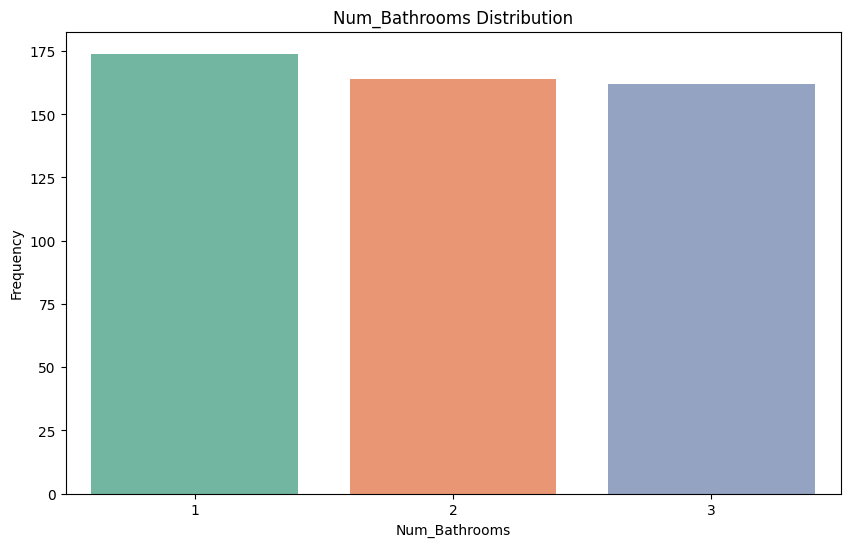

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Num_Bathrooms'].value_counts().index,
            y=df['Num_Bathrooms'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('Num_Bathrooms Distribution')
plt.xlabel('Num_Bathrooms')
plt.ylabel('Frequency')
plt.show()

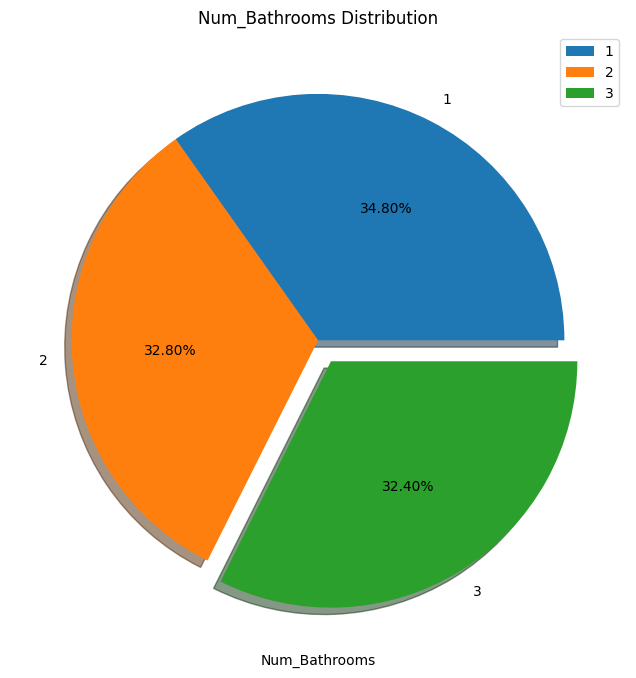

In [17]:
plt.figure(figsize=(10, 8))
plt.pie(df['Num_Bathrooms'].value_counts(),
        explode=[0,0,0.1],
        labels=df['Num_Bathrooms'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('Num_Bathrooms Distribution')
plt.xlabel('Num_Bathrooms')
plt.legend()
plt.show()

**Num_Floors**

In [18]:
df['Num_Floors'].value_counts()

Num_Floors
2    178
1    170
3    152
Name: count, dtype: int64

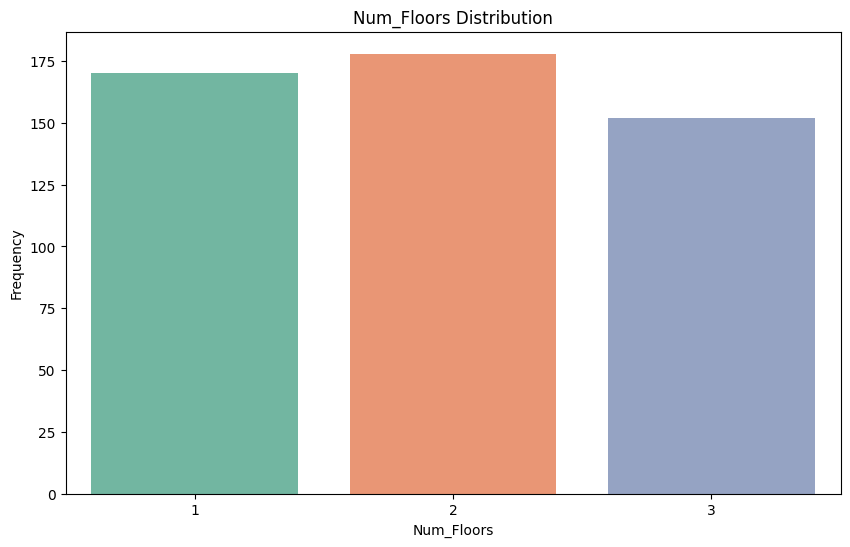

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Num_Floors'].value_counts().index,
            y=df['Num_Floors'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('Num_Floors Distribution')
plt.xlabel('Num_Floors')
plt.ylabel('Frequency')
plt.show()

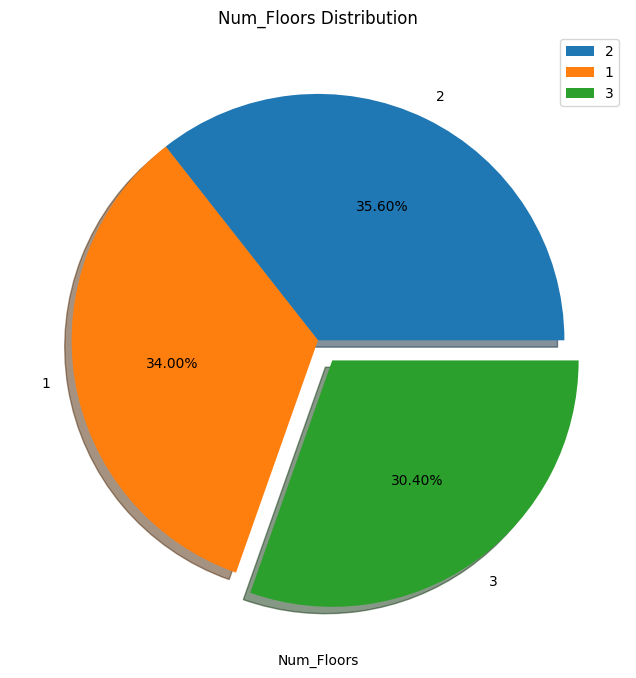

In [20]:
plt.figure(figsize=(10, 8))
plt.pie(df['Num_Floors'].value_counts(),
        explode=[0,0,0.1],
        labels=df['Num_Floors'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('Num_Floors Distribution')
plt.xlabel('Num_Floors')
plt.legend()
plt.show()

In [21]:
df['Year_Built'].value_counts()

Year_Built
1959    12
1920    12
1901    10
1935     9
1907     9
        ..
1952     1
1939     1
1936     1
1955     1
1993     1
Name: count, Length: 121, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


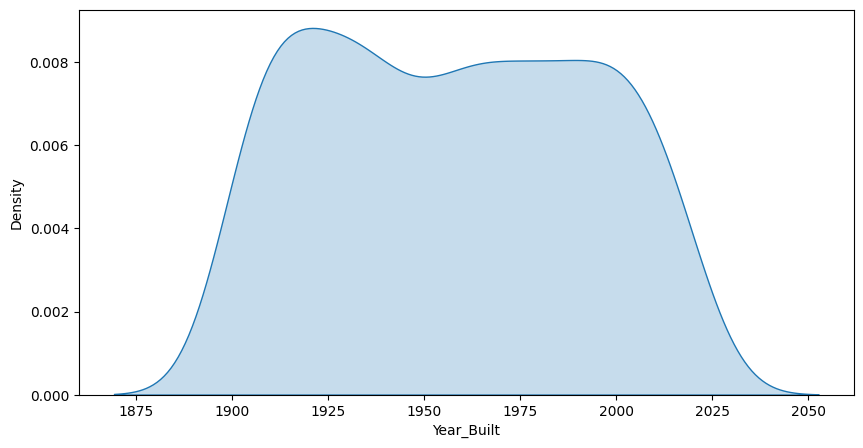

In [22]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Year_Built'],fill=True)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


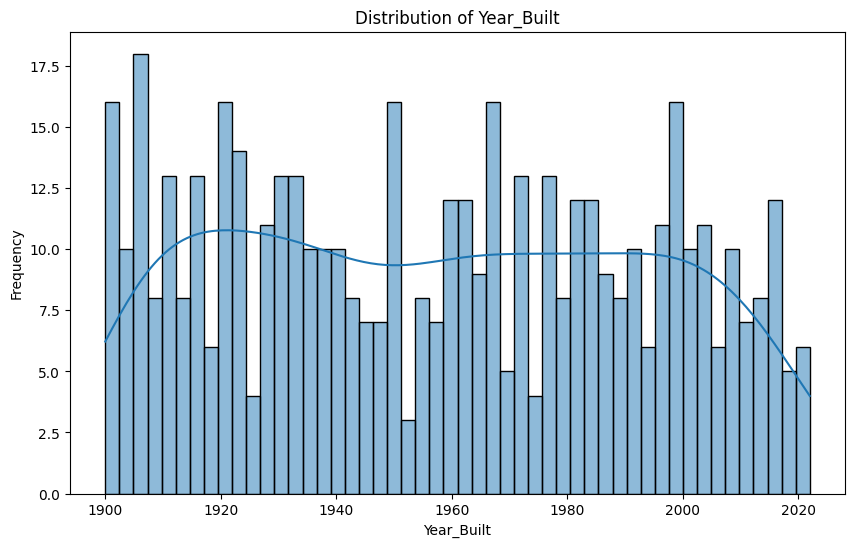

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Built'],bins=50, kde=True)  
plt.title('Distribution of Year_Built')
plt.xlabel('Year_Built')
plt.ylabel('Frequency')
plt.show()

**Has_Garden**

In [25]:
df['Has_Garden'].value_counts()

Has_Garden
1    268
0    232
Name: count, dtype: int64

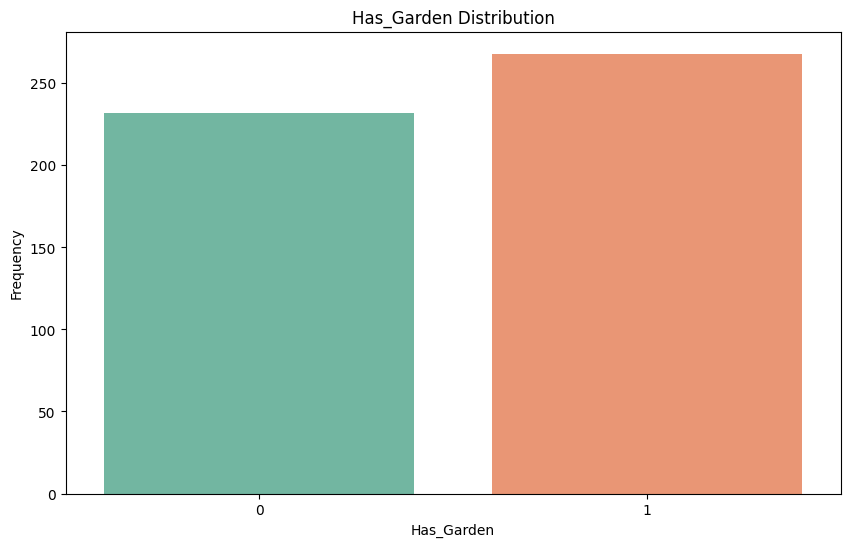

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Has_Garden'].value_counts().index,
            y=df['Has_Garden'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('Has_Garden Distribution')
plt.xlabel('Has_Garden')
plt.ylabel('Frequency')
plt.show()

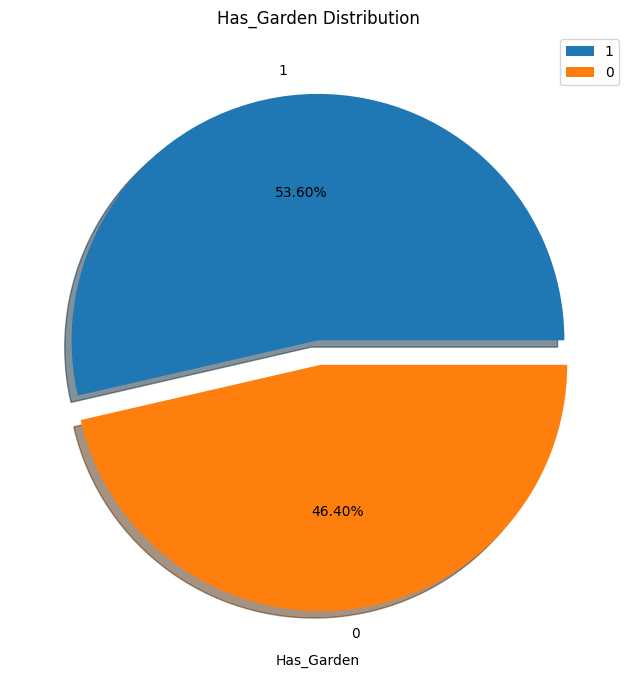

In [29]:
plt.figure(figsize=(10, 8))
plt.pie(df['Has_Garden'].value_counts(),
        explode=[0,0.1],
        labels=df['Has_Garden'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('Has_Garden Distribution')
plt.xlabel('Has_Garden')
plt.legend()
plt.show()

**Has_Pool**

In [32]:
df['Has_Pool'].value_counts()

Has_Pool
0    254
1    246
Name: count, dtype: int64

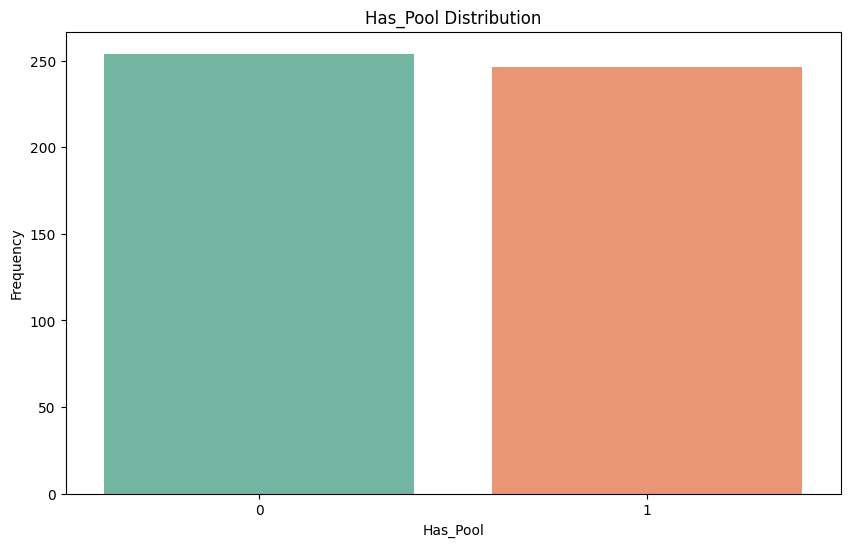

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['Has_Pool'].value_counts().index,
            y=df['Has_Pool'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('Has_Pool Distribution')
plt.xlabel('Has_Pool')
plt.ylabel('Frequency')
plt.show()

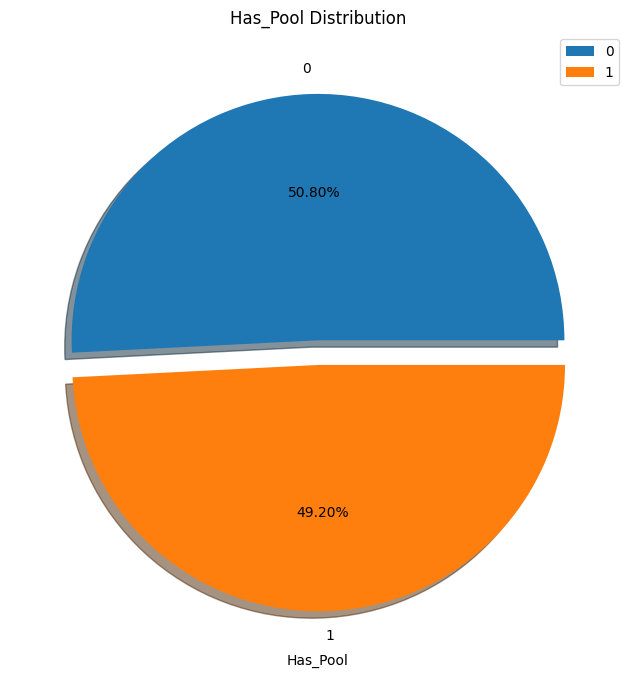

In [33]:
plt.figure(figsize=(10, 8))
plt.pie(df['Has_Pool'].value_counts(),
        explode=[0,0.1],
        labels=df['Has_Pool'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('Has_Pool Distribution')
plt.xlabel('Has_Pool')
plt.legend()
plt.show()

**Garage_Size**

In [35]:
df['Garage_Size'].value_counts()

Garage_Size
26    19
46    19
45    18
37    18
22    17
43    16
20    16
27    16
32    15
44    15
47    15
41    14
39    14
28    14
30    13
21    13
12    13
33    13
17    13
10    12
13    12
11    12
36    12
18    12
48    11
40    10
19    10
38    10
49    10
31    10
15     9
25     9
23     9
24     9
42     9
34     9
14     9
16     9
35     8
29     8
Name: count, dtype: int64

In [36]:
df['Garage_Size'].describe()

count    500.000000
mean      30.174000
std       11.582575
min       10.000000
25%       20.000000
50%       30.000000
75%       41.000000
max       49.000000
Name: Garage_Size, dtype: float64

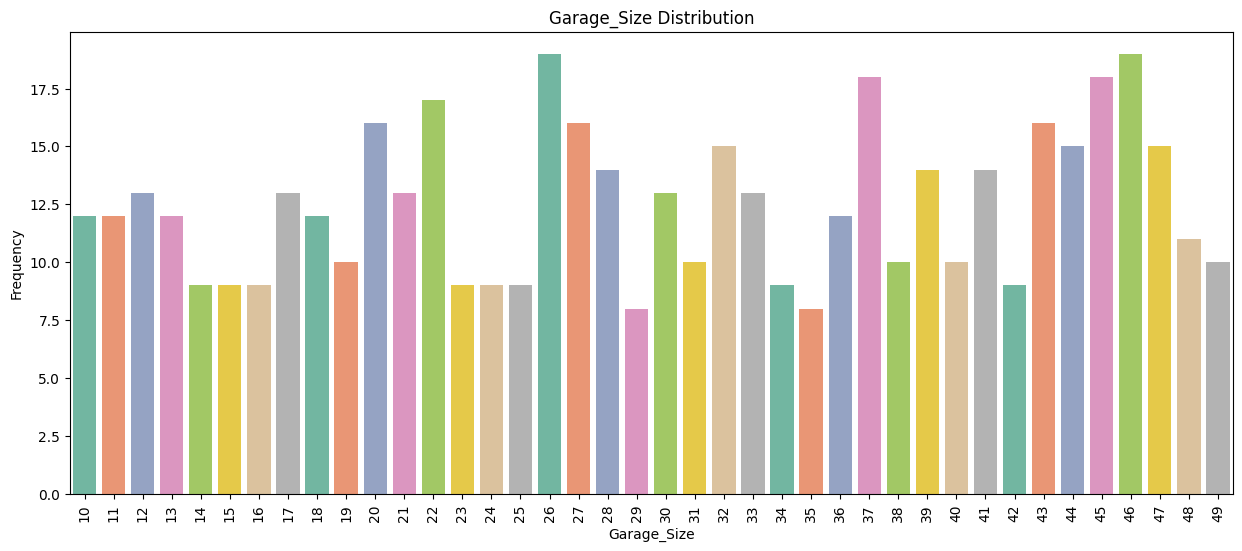

In [39]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x=df['Garage_Size'].value_counts().index,
            y=df['Garage_Size'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('Garage_Size Distribution')
plt.xlabel('Garage_Size')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

**Price**

In [40]:
df['Price'].describe()

count       500.000000
mean     582209.629529
std      122273.390345
min      276892.470136
25%      503080.344140
50%      574724.113347
75%      665942.301274
max      960678.274291
Name: Price, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


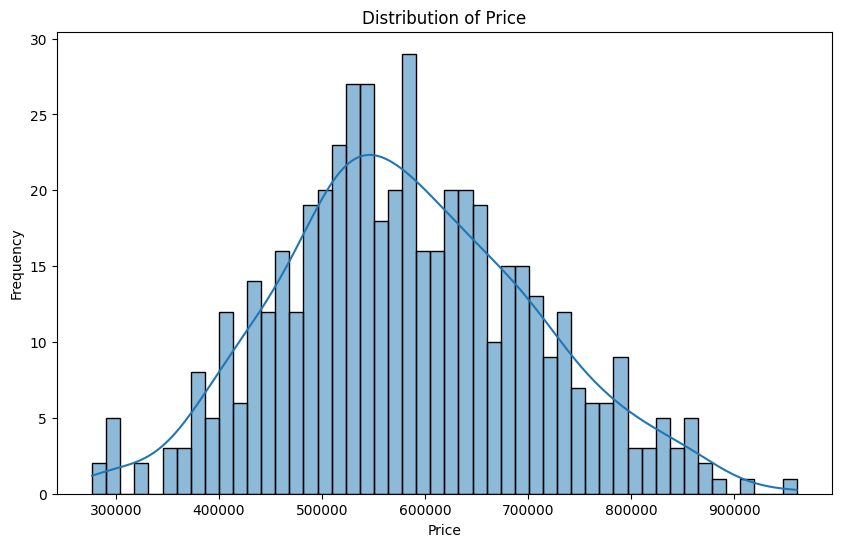

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'],bins=50, kde=True)  
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## **Data Preprocessing**

#### **Define Features X and Tanget y**

In [45]:
x=df.drop(columns='Price')

In [46]:
y=df['Price']

In [47]:
x

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277
...,...,...,...,...,...,...,...,...,...,...
495,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583
496,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105
497,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264
498,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684


In [48]:
y

0      602134.816747
1      591425.135386
2      464478.696880
3      583105.655996
4      619879.142523
           ...      
495    488496.350722
496    657736.921717
497    405324.950201
498    773035.968028
499    864299.500218
Name: Price, Length: 500, dtype: float64

#### **Data Splitting**

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

In [51]:
x_test.shape

(100, 10)

## **Data Modeling**

In [52]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [54]:
y_pred = lr.predict(x_test)

In [55]:
y_pred

array([575183.6265983 , 680721.17570791, 498698.99372393, 480419.39772538,
       708317.31179328, 533722.54028076, 365788.68154373, 566216.94942097,
       559065.24516452, 716345.60198604, 531271.02442728, 502370.20190522,
       465410.02768303, 452170.05740786, 550144.972034  , 727367.00599424,
       494069.12547414, 434732.15204783, 764241.5704061 , 705058.73179503,
       714850.73896965, 553545.98674554, 736264.5350584 , 343204.13173806,
       819951.74280084, 602333.0693934 , 390955.25888875, 603477.53348759,
       638076.33900743, 453637.91628501, 663461.50345562, 827074.8284106 ,
       619640.81576249, 485962.12763877, 492162.17348476, 698922.17147201,
       335166.91170072, 601676.35228316, 374307.7929755 , 503210.17856707,
       519615.8234477 , 506663.01451891, 584202.80439081, 756043.01961632,
       533053.25858387, 555899.20117701, 600432.00594797, 660147.86553921,
       607893.35269321, 450611.76688888, 493809.66286565, 574939.31345703,
       526361.18738621, 5

In [56]:
print(mean_squared_error(y_test, y_pred))

437730359.7082714


In [57]:
print(mean_absolute_error(y_test, y_pred))

16850.995604842206


In [58]:
sgd = SGDRegressor()

sgd.fit(x_train, y_train)

SGDRegressor()

In [60]:
y_pred = sgd.predict(x_test)

In [61]:
print(mean_absolute_error(y_test, y_pred))

1010703376319189.8


In [62]:
print(mean_squared_error(y_test, y_pred))

1.0394705754674829e+30


In [64]:
lasso = Lasso()

lasso.fit(x_train, y_train)

Lasso()

In [66]:
y_pred = lasso.predict(x_test)

In [67]:
print(mean_absolute_error(y_test, y_pred))

16851.690939822904


In [68]:
ridge = Ridge()

ridge.fit(x_train, y_train)

Ridge()

In [70]:
y_pred = ridge.predict(x_test)

In [71]:
print(mean_absolute_error(y_test, y_pred))

16910.75788555975
